In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pylab as plt
import matplotlib.dates as mdates

import seaborn as sns

In [23]:
train = pd.read_csv('C:/Users/Admin 16/Desktop/saleslstm/sales_train.csv')
print ('number of shops: ', train['shop_id'].max())
print ('number of items: ', train['item_id'].max())
num_month = train['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', train.shape)
train.head()

number of shops:  59
number of items:  22169
number of month:  33
size of train:  (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
test = pd.read_csv('C:/Users/Admin 16/Desktop/saleslstm/test.csv')
test.head()


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [25]:
sub = pd.read_csv('C:/Users/Admin 16/Desktop/saleslstm/sample_submission.csv')
sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [26]:
items = pd.read_csv('C:/Users/Admin 16/Desktop/saleslstm/items.csv')
print ('number of categories: ', items['item_category_id'].max()) # the maximun number of category id
items.head()

number of categories:  83


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [27]:
train_clean=train.drop(labels=['date','item_price'],axis=1)
train_clean.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
2,0,25,2552,-1.0
3,0,25,2554,1.0
4,0,25,2555,1.0


In [28]:
train_clean = train_clean.groupby(["item_id","shop_id","date_block_num"]).sum().reset_index()
train_clean = train_clean.rename(index=str, columns = {"item_cnt_day":"item_cnt_month"})
train_clean = train_clean[["item_id","shop_id","date_block_num","item_cnt_month"]]
train_clean

,item_id,shop_id,date_block_num,item_cnt_month
0,0,54,20,1.0
1,1,55,15,2.0
2,1,55,18,1.0
3,1,55,19,1.0
4,1,55,20,1.0
5,1,55,21,1.0
6,2,54,19,1.0
7,2,54,22,1.0
8,3,54,18,1.0
9,3,54,19,1.0


In [29]:
check = train_clean[["shop_id","item_id","date_block_num","item_cnt_month"]]
check = check.loc[check['shop_id'] == 5]
check = check.loc[check['item_id'] == 5037]
check

,shop_id,item_id,date_block_num,item_cnt_month
400439,5,5037,20,1.0
400440,5,5037,22,1.0
400441,5,5037,23,2.0
400442,5,5037,24,2.0
400443,5,5037,28,1.0
400444,5,5037,29,1.0
400445,5,5037,30,1.0
400446,5,5037,31,3.0
400447,5,5037,32,1.0


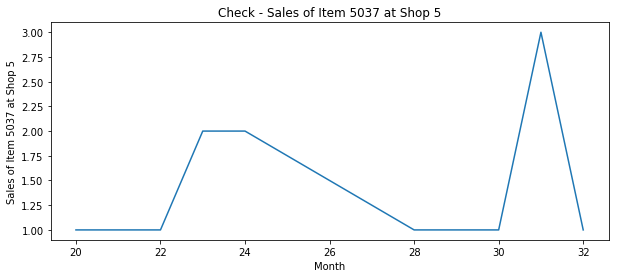

In [30]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(check["date_block_num"],check["item_cnt_month"]);

In [31]:
month_list=[i for i in range(num_month+1)]
shop = []
for i in range(num_month+1):
    shop.append(5)
item = []
for i in range(num_month+1):
    item.append(5037)
months_full = pd.DataFrame({'shop_id':shop, 'item_id':item,'date_block_num':month_list})
months_full

,date_block_num,item_id,shop_id
0,0,5037,5
1,1,5037,5
2,2,5037,5
3,3,5037,5
4,4,5037,5
5,5,5037,5
6,6,5037,5
7,7,5037,5
8,8,5037,5
9,9,5037,5


In [32]:
sales_33month = pd.merge(check, months_full, how='right', on=['shop_id','item_id','date_block_num'])
sales_33month = sales_33month.sort_values(by=['date_block_num'])
sales_33month.fillna(0.00,inplace=True)
sales_33month

,shop_id,item_id,date_block_num,item_cnt_month
9,5,5037,0,0.0
10,5,5037,1,0.0
11,5,5037,2,0.0
12,5,5037,3,0.0
13,5,5037,4,0.0
14,5,5037,5,0.0
15,5,5037,6,0.0
16,5,5037,7,0.0
17,5,5037,8,0.0
18,5,5037,9,0.0


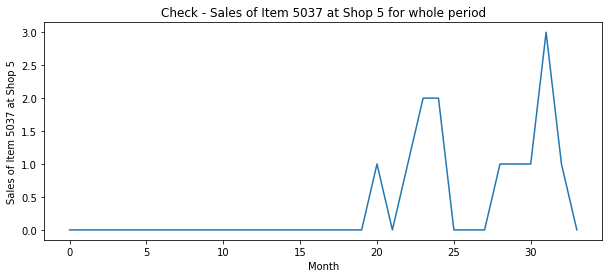

In [33]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5 for whole period')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(sales_33month["date_block_num"],sales_33month["item_cnt_month"]);